In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import zipcodes as zcode

In [2]:
df= pd.read_csv('Loan_Modelling.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Loan_Modelling.csv'

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

1. To find out the Potential Customer
2. Which variables/features are most significant
3. Which segment of customers should be targeted more

In [ ]:
df.drop('ID',axis=1,inplace=True)

In [ ]:
df.sample(5)

In [ ]:
print('Number of unique values:\n------------------------------\n',df.nunique(),sep='')

In [ ]:
print('Unique Data for all\n')
for c in df.columns:
    print(c,df[c].unique(),'',sep='\n-----------------\n')

In [ ]:
cat_cols = ['Family','Education','Securities_Account','CD_Account','Online','CreditCard','Personal_Loan']
cont_cols = ['Age','Experience','Income','CCAvg','Mortgage']

### Preprocessing

In [ ]:
# viewing the negative experience values
df[df['Experience']<0]

In [ ]:
df[df['Experience']<0].groupby(['Age','Education'])['Experience'].count()

In [ ]:
import numpy as np

In [ ]:
# working on zipcodes

In [ ]:
zcode.matching('92691')

In [ ]:
zcode.matching('90065')[0].get('county')

In [ ]:
df['County'] = df['ZIPCode'].apply(lambda x: zcode.matching(str(x))[0].get('county') if len(zcode.matching(str(x))) else str(x))

In [ ]:
df['County'].nunique()

In [ ]:
df.sample(5)

### EDA

In [ ]:
for col in cat_cols:
    print('Feature:',col)
    print(df[col].value_counts().sort_index())
    print()
    print('#'*20)
    print()

In [ ]:
print(round(df['Personal_Loan'].value_counts()/len(df)*100,2))

In [ ]:
import seaborn as sns

In [ ]:
def plot_pie_count(col, r,c,n):
    plt.subplot(r,c,n)
    df[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.subplot(r,c,n+1)
    sns.countplot(x=col, data=df, hue='Personal_Loan')

In [ ]:
len(cat_cols)

In [ ]:
cat_cols

In [ ]:
plt.figure(figsize=(25,15))
for i,c in enumerate(cat_cols):
    plot_pie_count(c,3,6,(i*2)+1)

In [ ]:
def plot_dist(col,r,c,p):
    clr = ['orange','blue']
    for i in range(2):
        plt.subplot(r,c,p+i)
        mean = df[col][df['Personal_Loan']==i].mean()
        median = df[col][df['Personal_Loan']==i].median()
        mode = df[col][df['Personal_Loan']==i].mode().tolist()[0]
        plt.axvline(mean, color='r', linestyle='--', linewidth=2)
        plt.axvline(median, color='b', linestyle='-', linewidth=2)
        plt.axvline(mode, color='g', linestyle='-.', linewidth=2)
        sns.histplot(df[col][df['Personal_Loan']==i], bins=20, color=clr[i])
        plt.legend({'Mean %.1f'%mean:mean, 'Median %.1f'%median : median, 'Mode %.1f'%mode : mode})
        plt.title(col+' & Personal Loan ={}'.format(i))

In [3]:
plt.figure(figsize=(25,15))
for i,c in enumerate(cont_cols):    
    plot_dist(c,3,4,(i*2)+1)

NameError: name 'cont_cols' is not defined

<Figure size 1800x1080 with 0 Axes>

In [4]:
df['County'] = df['County'].apply(lambda x:x.replace(' County',''))

NameError: name 'df' is not defined

In [5]:
# plt.figure(figsize=(15,25))
pd.crosstab(index=df['County'], columns=df['Personal_Loan'].sort_values(ascending=False)).plot(kind='barh',stacked=True,figsize=(15,18))
plt.grid()

NameError: name 'df' is not defined

In [6]:
c200 = df['County'].value_counts().index[df['County'].value_counts()>200]
c200

NameError: name 'df' is not defined

In [7]:
df['CountyGroup'] = df['County'].apply(lambda x: x if x in c200 else 'Other')

NameError: name 'df' is not defined

In [8]:
df.head()

NameError: name 'df' is not defined

In [9]:
pd.crosstab(index=df['CountyGroup'], columns=df['Personal_Loan'].sort_values(ascending=False)).plot(kind='barh',stacked=True,figsize=(15,8))
plt.grid()

NameError: name 'df' is not defined

In [10]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),cmap='BrBG',annot=True)

NameError: name 'sns' is not defined

<Figure size 1080x432 with 0 Axes>

##### OutliersDetection & Removal

In [11]:
plt.figure(figsize=(18,5))
for i,c in enumerate(cont_cols):
    plt.subplot(1,5,i+1)
    sns.boxplot(x='Personal_Loan',y=c, data=df)
#     plt.boxplot(df[c],whis=1.5)
    plt.tight_layout()
    plt.title(c.upper())
    plt.grid()

NameError: name 'cont_cols' is not defined

<Figure size 1296x360 with 0 Axes>

In [12]:
income = df['Income'].copy()

NameError: name 'df' is not defined

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
sns.boxplot(income)

NameError: name 'sns' is not defined

In [15]:
Q1 = income.quantile(0.25)
Q3 = income.quantile(0.75)
IQR = Q3-Q1
print('IQR is:',IQR)

NameError: name 'income' is not defined

In [16]:
Q1

NameError: name 'Q1' is not defined

In [17]:
first_q = Q1-1.5*IQR
third_q = Q3+1.5*IQR
print(first_q)
print(third_q)

NameError: name 'Q1' is not defined

In [18]:
income1 = income[(income<=third_q)&(income>=first_q)]

NameError: name 'income' is not defined

In [19]:
sns.boxplot(income1)

NameError: name 'sns' is not defined

In [20]:
sum((income<=third_q)&(income>=first_q))

NameError: name 'income' is not defined

### Prepare the Data for Training

In [21]:
df.columns

NameError: name 'df' is not defined

In [22]:
x = df[['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities_Account','CD_Account','Online','CreditCard']]
y = df['Personal_Loan']

NameError: name 'df' is not defined

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
xtrain,xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25, random_state=101)

NameError: name 'x' is not defined

### Machine Learning

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [51]:
model_log = LogisticRegression().fit(xtrain,ytrain)
model_dt = DecisionTreeClassifier().fit(xtrain,ytrain)
model_rf = RandomForestClassifier().fit(xtrain,ytrain)
model_svc = SVC().fit(xtrain,ytrain)

In [52]:
model_log.score(xtest,ytest)

0.9448

In [53]:
model_dt.score(xtest,ytest)

0.98

In [54]:
model_rf.score(xtest,ytest)

0.9864

In [55]:
model_svc.score(xtest,ytest)

0.9144

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import scipy.stats as stats
import statsmodels.api as sm

In [62]:
from sklearn.model_selection import GridSearchCV

In [60]:
pd.DataFrame(model_log.coef_, index=['Coefficient'],columns=x.columns).T

,Coefficient
Age,-0.489065
Experience,0.487918
Income,0.050265
Family,0.666452
CCAvg,0.083024
Education,1.598608
Mortgage,0.000926
Securities_Account,0.260919
CD_Account,2.860832
Online,-0.583027


In [68]:
sns.set_style('whitegrid')

In [86]:
def performance(xt, yt, model):
    yp = model.predict(xt)
    print('Classification Report')
    print('-'*30)
    print('R2-Score:',model.score(xt,yt))
    print(classification_report(yt,yp))
    print('-'*30)
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.heatmap(pd.DataFrame(confusion_matrix(yt,yp),index=['No','Yes'],columns=['No','Yes']),annot=True,fmt='d')
    plt.title('Confusion Matrix')
    rocAuc = roc_auc_score(yt, yp)
    fpr,tpr,th = roc_curve(yt, yp)
    plt.subplot(1,2,2)
    plt.plot(fpr,tpr, label = 'Model (area=%0.2f)'%rocAuc)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')
    plt.show()

Classification Report
------------------------------
R2-Score: 0.9448
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1137
           1       0.81      0.51      0.63       113

    accuracy                           0.94      1250
   macro avg       0.88      0.75      0.80      1250
weighted avg       0.94      0.94      0.94      1250

------------------------------


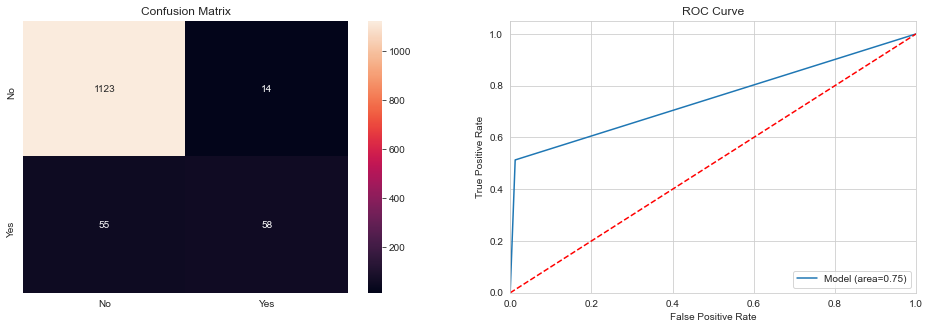

In [87]:
performance(xtest,ytest, model_log)

Classification Report
------------------------------
R2-Score: 0.98
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1137
           1       0.89      0.88      0.89       113

    accuracy                           0.98      1250
   macro avg       0.94      0.94      0.94      1250
weighted avg       0.98      0.98      0.98      1250

------------------------------


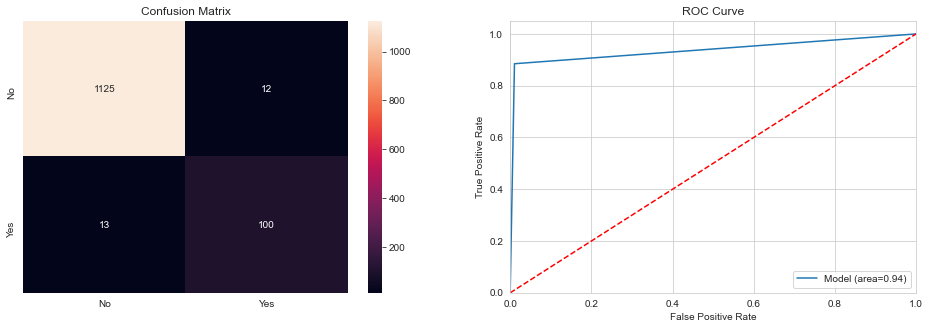

In [88]:
performance(xtest,ytest, model_dt)

Classification Report
------------------------------
R2-Score: 0.9864
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1137
           1       1.00      0.85      0.92       113

    accuracy                           0.99      1250
   macro avg       0.99      0.92      0.96      1250
weighted avg       0.99      0.99      0.99      1250

------------------------------


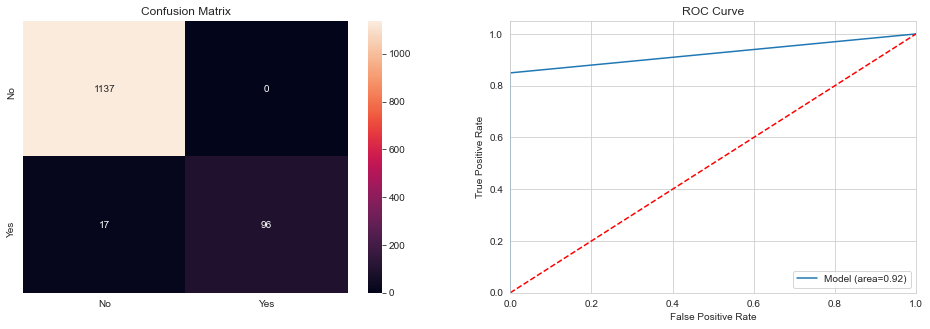

In [89]:
performance(xtest,ytest, model_rf)

Classification Report
------------------------------
R2-Score: 0.9144
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1137
           1       0.67      0.11      0.18       113

    accuracy                           0.91      1250
   macro avg       0.79      0.55      0.57      1250
weighted avg       0.90      0.91      0.89      1250

------------------------------


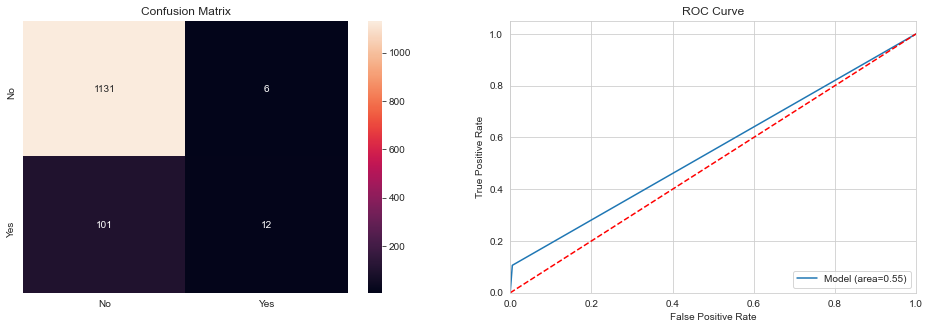

In [90]:
performance(xtest,ytest, model_svc)

### Improving the performance of the Models

Classification Report
------------------------------
R2-Score: 0.9528
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1137
           1       0.82      0.61      0.70       113

    accuracy                           0.95      1250
   macro avg       0.89      0.80      0.84      1250
weighted avg       0.95      0.95      0.95      1250

------------------------------


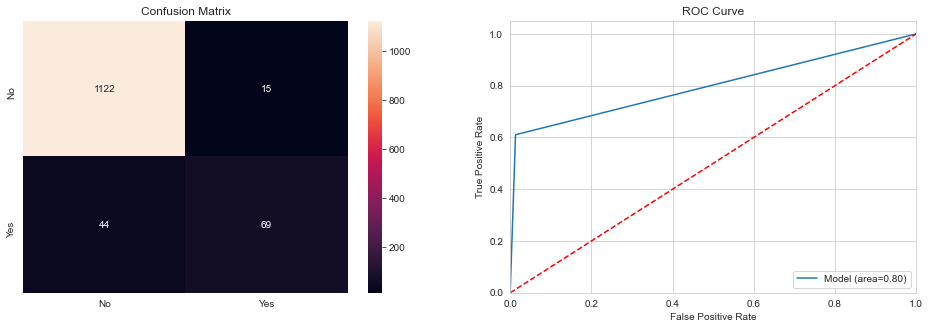

In [98]:
model_log1 = LogisticRegression(solver='newton-cg',random_state=101,class_weight={0:0.5, 1:0.75}).fit(xtrain,ytrain)
performance(xtest,ytest,model_log1)

In [100]:
params = {'solver':['lbfgs','newton-cg'],'class_weight':[{0:0.5, 1:0.75}, {0:0.5, 1:0.5}, {0:0.2, 1:0.8},{0:0.8, 1:0.8},{0:0.9, 1:0.1},{0:0.1, 1:0.9}] }

In [101]:
gcv_legit = GridSearchCV(LogisticRegression(),param_grid=params,verbose=3).fit(xtrain,ytrain)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] class_weight={0: 0.5, 1: 0.75}, solver=lbfgs ....................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=lbfgs, score=0.941, total=   0.1s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=lbfgs ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  class_weight={0: 0.5, 1: 0.75}, solver=lbfgs, score=0.956, total=   0.2s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=lbfgs ....................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=lbfgs, score=0.935, total=   0.2s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=lbfgs ....................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  class_weight={0: 0.5, 1: 0.75}, solver=lbfgs, score=0.952, total=   0.2s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=lbfgs ....................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=lbfgs, score=0.945, total=   0.1s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=newton-cg ................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=newton-cg, score=0.945, total=   0.3s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=newton-cg ................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=newton-cg, score=0.959, total=   0.3s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=newton-cg ................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=newton-cg, score=0.941, total=   0.3s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=newton-cg ................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=newton-cg, score=0.949, total=   0.3s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=newton-cg ................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=newton-cg, score=0.949, total=   0.4s
[

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   14.8s finished


In [102]:
gcv_legit.best_params_

{'class_weight': {0: 0.8, 1: 0.8}, 'solver': 'newton-cg'}

Classification Report
------------------------------
R2-Score: 0.9528
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1137
           1       0.86      0.57      0.68       113

    accuracy                           0.95      1250
   macro avg       0.91      0.78      0.83      1250
weighted avg       0.95      0.95      0.95      1250

------------------------------


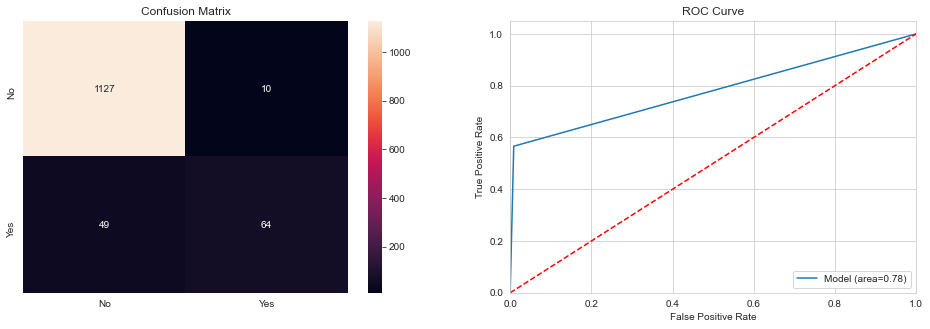

In [103]:
performance(xtest,ytest,gcv_legit.best_estimator_)

In [104]:
pd.DataFrame(gcv_legit.best_estimator_.coef_, index=['Coefficient'],columns=x.columns).T

,Coefficient
Age,-0.079742
Experience,0.089982
Income,0.051790
Family,0.685185
CCAvg,0.121470
Education,1.634057
Mortgage,0.000828
Securities_Account,-0.659308
CD_Account,3.427122
Online,-0.676103


###### dropping the columns, which are less relavent

In [105]:
xtrain.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [106]:
xtrain1 = xtrain.drop(['Age','Experience','Family','Securities_Account','Online', 'CreditCard'],axis=1)
xtest1 = xtest.drop(['Age','Experience','Family','Securities_Account','Online', 'CreditCard'],axis=1)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] class_weight={0: 0.5, 1: 0.75}, solver=lbfgs ....................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=lbfgs, score=0.937, total=   0.1s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=lbfgs ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  class_weight={0: 0.5, 1: 0.75}, solver=lbfgs, score=0.956, total=   0.1s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=lbfgs ....................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=lbfgs, score=0.923, total=   0.2s

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s



[CV] class_weight={0: 0.5, 1: 0.75}, solver=lbfgs ....................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=lbfgs, score=0.948, total=   0.1s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=lbfgs ....................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=lbfgs, score=0.944, total=   0.1s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=newton-cg ................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=newton-cg, score=0.937, total=   0.2s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=newton-cg ................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=newton-cg, score=0.956, total=   0.2s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=newton-cg ................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=newton-cg, score=0.923, total=   0.2s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=newton-cg ................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=newton-cg, score=0.948, total=   0.2s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=newton-cg ................
[CV]  class_

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   10.3s finished


Classification Report
------------------------------
R2-Score: 0.9496
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1137
           1       0.85      0.54      0.66       113

    accuracy                           0.95      1250
   macro avg       0.90      0.77      0.82      1250
weighted avg       0.95      0.95      0.94      1250

------------------------------


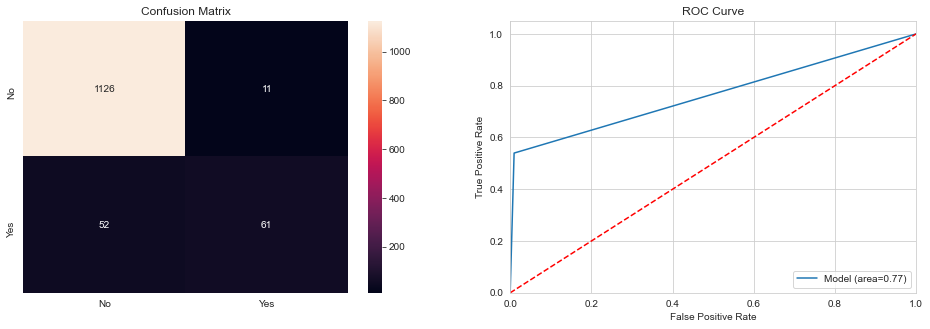

In [107]:
gcv_legit1 = GridSearchCV(LogisticRegression(),param_grid=params,verbose=3).fit(xtrain1,ytrain)


Classification Report
------------------------------
R2-Score: 0.9496
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1137
           1       0.85      0.54      0.66       113

    accuracy                           0.95      1250
   macro avg       0.90      0.77      0.82      1250
weighted avg       0.95      0.95      0.94      1250

------------------------------


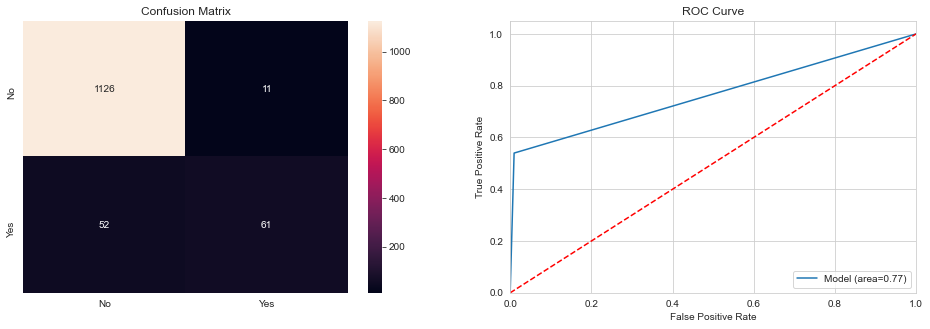

In [108]:
performance(xtest1,ytest,gcv_legit1.best_estimator_)